In [1]:
# type your code here
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import optimize
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import datetime

In [2]:
bikeData = pd.read_csv('SeoulBikeData.csv')

In [3]:
bikeData.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bikeData.tail()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
bikeData.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,18-04-2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


In [7]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [8]:
bikeData['Hour'].describe()

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

In [9]:
bikeData.shape

(8760, 14)

<a id="outliers"></a>
## 2.1 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

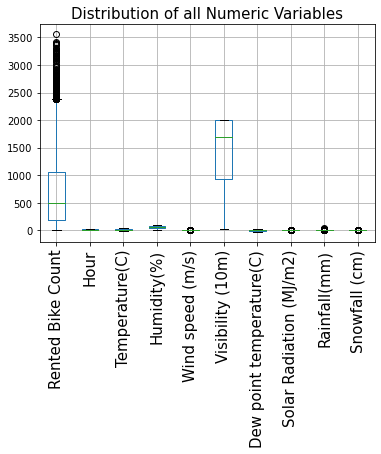

In [10]:
# plot a boxplot to visualize the outliers in all the numeric variables
bikeData.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Rented Bike Count' has a quite large range as compared to the other variables.**

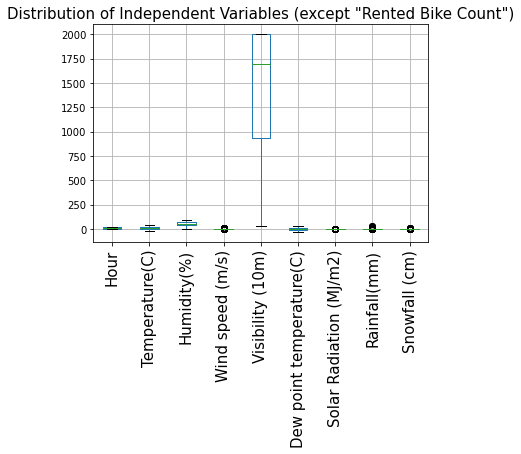

In [11]:
# plot boxplots of all the numeric variables except 'Rented Bike Count' 
# use 'iloc[]' to select the variables except 'Rented Bike Count' 
bikeData.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Rented Bike Count")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an dependent variable 'Rented Bike Count'.**

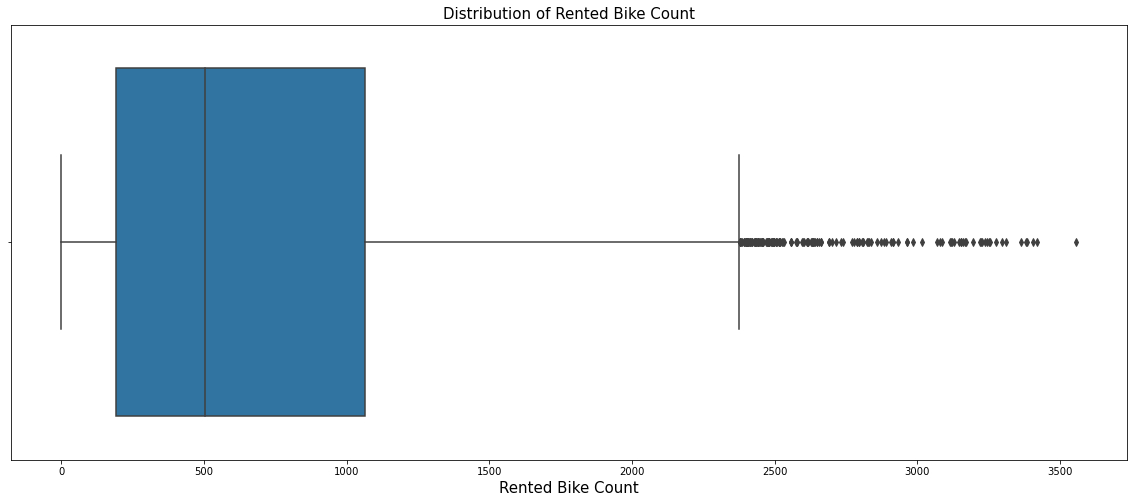

In [12]:
plt.figure(figsize=(20,8))
# plot boxplot for 'Rented Bike Count' using seaborn library
sns.boxplot(bikeData['Rented Bike Count'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Rented Bike Count', fontsize = 15)
plt.xlabel('Rented Bike Count', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that the variable Rented Bike Count has points above the upper extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [13]:
# calculate the first quartile
Q1 = bikeData.quantile(0.25)

# calculate the third quartile
Q3 = bikeData.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
bikeData = bikeData[~((bikeData < (Q1 - 1.5 * IQR)) | (bikeData > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
bikeData.shape

(6922, 14)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 2.2  Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [14]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = bikeData.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (bikeData.isnull().sum()*100/bikeData.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Functioning Day,0,0.0
Holiday,0,0.0
Seasons,0,0.0
Snowfall (cm),0,0.0
Rainfall(mm),0,0.0
Solar Radiation (MJ/m2),0,0.0
Dew point temperature(C),0,0.0
Visibility (10m),0,0.0
Wind speed (m/s),0,0.0
Humidity(%),0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 2.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [15]:
# std() returns the standard deviation of each variable 
bikeData.std()

Rented Bike Count           602.386858
Hour                          7.229378
Temperature(C)               11.447255
Humidity(%)                  18.728656
Wind speed (m/s)              0.933048
Visibility (10m)            589.616569
Dew point temperature(C)     12.842695
Solar Radiation (MJ/m2)       0.649744
Rainfall(mm)                  0.000000
Snowfall (cm)                 0.000000
dtype: float64

**Interpretation:** As we can see that the variable 'Rainfall(mm)' and 'Snowfall (cm)' has a standard deviation of zero and thus, it will not contribute to our model. So, we will drop the column 'Rainfall(mm)' and 'Snowfall (cm)'. 

In [16]:
# drop the column 'lights' using drop()
# 'axis = 1' drops the specified column
bikeData = bikeData.drop(['Rainfall(mm)','Snowfall (cm)'], axis = 1)

In [17]:
bikeData.shape

(6922, 12)

### Transformations

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

In [18]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

<a id="sqr"></a>
### 3.1.1 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. It can be used on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> sqrt(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply square root transformation on y_train. 

In [19]:
# perform the square root transformation on y_train and display the top 5 observations
np.sqrt(y_train).head()

6359    33.421550
8659    34.365681
2552    19.595918
7544    44.721360
5726    22.516660
Name: Rented Bike Count, dtype: float64

<a id="rec"></a>
### 3.1.2 Reciprocal Transformation

Transform the target and/or independent variables by taking its reciprocal. This transformation changes the distribution of the variable drastically. We can not perform the transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> 1/y = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply reciprocal transformation on y_train.

In [20]:
# perform the reciprocal transformation on y_train and display the top 5 observations
(1 / y_train).head()

6359    0.000895
8659    0.000847
2552    0.002604
7544    0.000500
5726    0.001972
Name: Rented Bike Count, dtype: float64

<a id="log"></a>
### 3.1.3 Log Transformation

Transform the target and/or independent variables by applying a log on the original data to reduce the skewness. We can not apply log transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:
<p style='text-indent:28em'> <strong> log(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

In [21]:
# perform the log transformation on y_train and display the top 5 observations
np.log(y_train).head()

6359    7.018402
8659    7.074117
2552    5.950643
7544    7.600902
5726    6.228511
Name: Rented Bike Count, dtype: float64

<a id="box"></a>
### 3.1.4 Box-Cox Transformation

It is a generalized version of log transformation.
It makes the variable more symmetrical by reducing its skewness. The transformation is given as:<br>

<p style='text-indent:30em'> <strong> y<sup>'</sup><sub>λ</sub> = (y<sup>λ</sup> -1) / λ   </strong> </p>

λ > 1, reduces the negative skewness in the variable and makes it more symmetrical<br>
λ < 1, reduces the positive skewness in the variable and makes it more symmetrical<br>
λ = 1, shifts the variable to the left by 1

The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:30em'> <strong> y<sup>λ</sup> = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

In [22]:
# perform the box-cox transformation on y_train and display the top 5 observations
# '[0]' returns the transformed values of y_train
# use '[0:5]' to print the first five transformed values
xyz = bikeData[bikeData['Rented Bike Count']>0]
xyz['box'] = stats.boxcox(xyz['Rented Bike Count'])[0]
xyz['box']

0       12.892550
1       11.934043
2       11.250029
3        9.422428
4        8.343763
          ...    
8755    20.391072
8756    18.674717
8757    18.098443
8758    18.250531
8759    17.100597
Name: box, Length: 6663, dtype: float64

### 1.1 Utility Functions

#### Convert hour into 3 buckets

In [23]:
def convertHourBuckets(hour):
    hour = int(hour)
    if hour < 10:
        return 'morning'
    elif hour < 18:
        return 'day'
    else:
        return 'night'

In [24]:
# Convert a date in the format 12/09/2018 to corresponding day = "Wednesday"
def convertDate2Day(date):
    if datetime.datetime.strptime(date, '%d-%m-%Y'):
        return datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%A')
    elif datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
# Convert a date in the format 12/09/2018 to weekday or weekend if weekend returns 1
# did not consider the middle east standard, as the data is from Korea
def convertDate2Weekend(date):
    day = convertDate2Day(date)
    if day in ["Sunday","Saturday"]:
        return 1
    return 0

#### Scaling all together

In [25]:
def standardScale_dataframe(data,name_suffix = "_std"):
    std_scale = StandardScaler()
    variables = []
    numeric_df = data.select_dtypes(include=[np.number])
    for param in numeric_df.columns:
        param_name = param.strip()+name_suffix
        variables.append(param_name)
        if param_name not in (numeric_df.columns):
            print(param_name)
            numeric_df[param_name] = std_scale.fit_transform(data[[param]]) # returns z-scores of the values of the attribute
    return numeric_df,variables


#### Model Performance logged into a dataframe for comparison

In [26]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    mape = np.abs((actual - predicted) / actual)
    mape = mape[~np.isnan(mape)]
    return ((mape) * 100).mean()

def model_metrics(result_df,model,name,remarks,datatype,y,y_hat):

    # calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
    # use 'rsquared' to calculate R-squared value
    # use 'rsquared_adj' to calculate Adjusted R-squared value
    # use 'mean_squared_error' to calculate MSE
    # use 'rmse' to calculate RMSE
    # use 'mean_absolute_error' to calculate MAE
    # use the defined function 'mape' to calculate MAPE
    residuals = model.resid

    MLR_full_model_metrics = pd.Series({'Model_Name': name,
                                        'Data_Type': datatype,
                                        'Remarks': remarks,
                                        'R-squared': model.rsquared,
                                        'Adj. R-squared': model.rsquared_adj,
                                        'Durbin_Watson':statsmodels.stats.stattools.durbin_watson(residuals, axis=0),
                                        'JB_Prob':statsmodels.stats.stattools.jarque_bera(residuals, axis=0)[1],
                                        'Condition_No': model.condition_number,
                                        'MSE': mean_squared_error(y, y_hat),
                                        'RMSE': np.sqrt(mean_squared_error(y, y_hat)),
                                        'MAE': mean_absolute_error(y, y_hat),
                                       })

    
    # append the values to the result table
    result_df = result_df[(result_df.Model_Name != name)]
    result_df = result_df.append(MLR_full_model_metrics, ignore_index = True)

    return result_df

In [27]:
#Utility function which wraps repeatedly used stuff for lr Models

In [28]:
def lr_model_experiment(df,target,exp_name,remarks,result_df,test_size=0.3,random_state = 123):
    X = df
    X = sm.add_constant(X)
    X = X.drop(target,axis = 1)
    print(X.columns)
    Y = df[target]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state) 
    lin_reg_model = sm.OLS(y_train,x_train).fit()
    
    y_test_predict = lin_reg_model.predict(x_test)

    out_df = model_metrics(result_df,lin_reg_model,exp_name+'_Test',remarks,"Test",y_test,y_test_predict)
    
    y_train_predict = lin_reg_model.predict(x_train)

    out_df = model_metrics(out_df,lin_reg_model,exp_name+'_Train',remarks,"Train",y_train,y_train_predict)
    return out_df,lin_reg_model,len(x_train)

### 1.2 Categorical Variables

In [29]:
#Convert the Hours into 3 buckets
bikeData['Hour_bkt'] = bikeData['Hour'].apply(lambda x : convertHourBuckets(x))

In [30]:
#bikeData['Date'] = bikeData['Date'].apply(lambda x : convertDate2Day(x))

In [31]:
#Convert the Hours into 3 buckets
bikeData['Weekend'] = bikeData['Date'].apply(lambda x : convertDate2Weekend(x))

In [32]:
bikeData.Hour_bkt.unique()

array(['morning', 'day', 'night'], dtype=object)

In [33]:
#do the n-1 dummy encoding
bikeCatData_enc = pd.get_dummies(bikeData[['Seasons','Hour_bkt','Functioning Day','Holiday']],'',drop_first=True)
bikeCatData_enc.rename(columns={'_Yes':'FunctionDay'},inplace=True)
bikeCatData_enc.head(2)

,_Spring,_Summer,_Winter,_morning,_night,FunctionDay,_No Holiday
0,0,0,1,1,0,1,1
1,0,0,1,1,0,1,1


### 1.3 Take out all numbers

In [34]:
bikeData_num = bikeData.select_dtypes(include=[np.number])
bikeData_num = bikeData_num.drop('Hour',axis = 1)

In [35]:
bikeData_feats = pd.concat([bikeData_num,bikeCatData_enc], axis=1)

In [36]:
bikeData_feats.describe()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Weekend,_Spring,_Summer,_Winter,_morning,_night,FunctionDay,_No Holiday
count,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000
mean,705.297602,12.466094,57.829818,1.604652,1467.047385,3.745550,0.413180,0.290956,0.245738,0.237793,0.244582,0.459838,0.262641,0.962583,0.949726
std,602.386858,11.447255,18.728656,0.933048,589.616569,12.842695,0.649744,0.454236,0.430555,0.425762,0.429870,0.498420,0.440101,0.189795,0.218527
min,0.000000,-15.100000,0.000000,0.000000,27.000000,-25.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.000000,3.700000,44.000000,0.900000,990.000000,-5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,524.500000,12.600000,58.000000,1.400000,1727.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1062.000000,21.600000,72.000000,2.200000,2000.000000,14.200000,0.677500,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2375.000000,39.000000,98.000000,4.300000,2000.000000,26.100000,2.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Hour_bkt,Weekend
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday,Yes,morning,0
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday,Yes,morning,0
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday,Yes,morning,0
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday,Yes,morning,0
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday,Yes,morning,0


<a id="after"></a>
## 3.2 Model Performance after Transformation

#### First, we build the model using the original data.

In [38]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData_feats.copy()

#### Split the data into training and test sets.

In [39]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5537, 15)
y_train (5537,)
X_test (1385, 15)
y_test (1385,)


**Build the multiple linear regression model using the OLS method.**

In [40]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     534.1
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:04:28   Log-Likelihood:                -40927.
No. Observations:                5537   AIC:                         8.188e+04
Df Residuals:                    5522   BIC:                         8.198e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 1.935). Thus, we conclude that there is no autocorrelation.

### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  0.8107347158330269


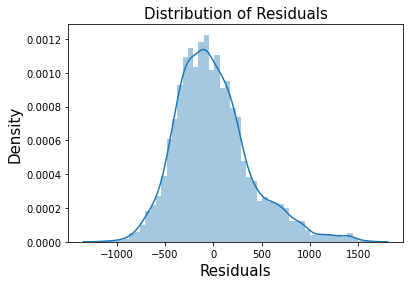

In [41]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

We can see that the distribution of the residuals is positively skewed. Thus, we will apply a log transformation to the target variable.

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

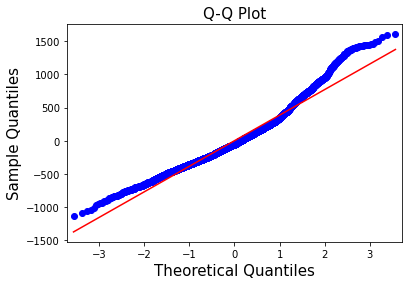

In [42]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 1.3445. We will log transform the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

In [43]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use log transformation of y_train 
MLR_model_after_transform = sm.OLS(np.log(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 16 Sep 2021   Prob (F-statistic):                nan
Time:                        18:04:30   Log-Likelihood:                    nan
No. Observations:                5537   AIC:                               nan
Df Residuals:                    5522   BIC:                               nan
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Interpretation** The value of R-Squared increases from 0.352 to 0.353 and the value of Adjusted R-Squared increases from 0.315 to 0.317. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  nan


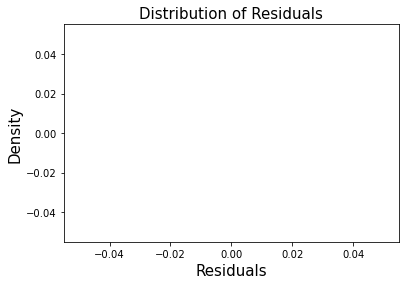

In [44]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

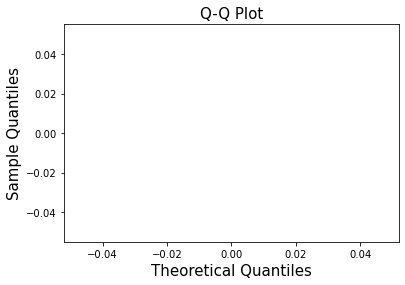

In [45]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

### 3. Multiple Linear Regression(MLR)

### 3.1 Understanding the Features Relations

<Figure size 1080x1080 with 0 Axes>

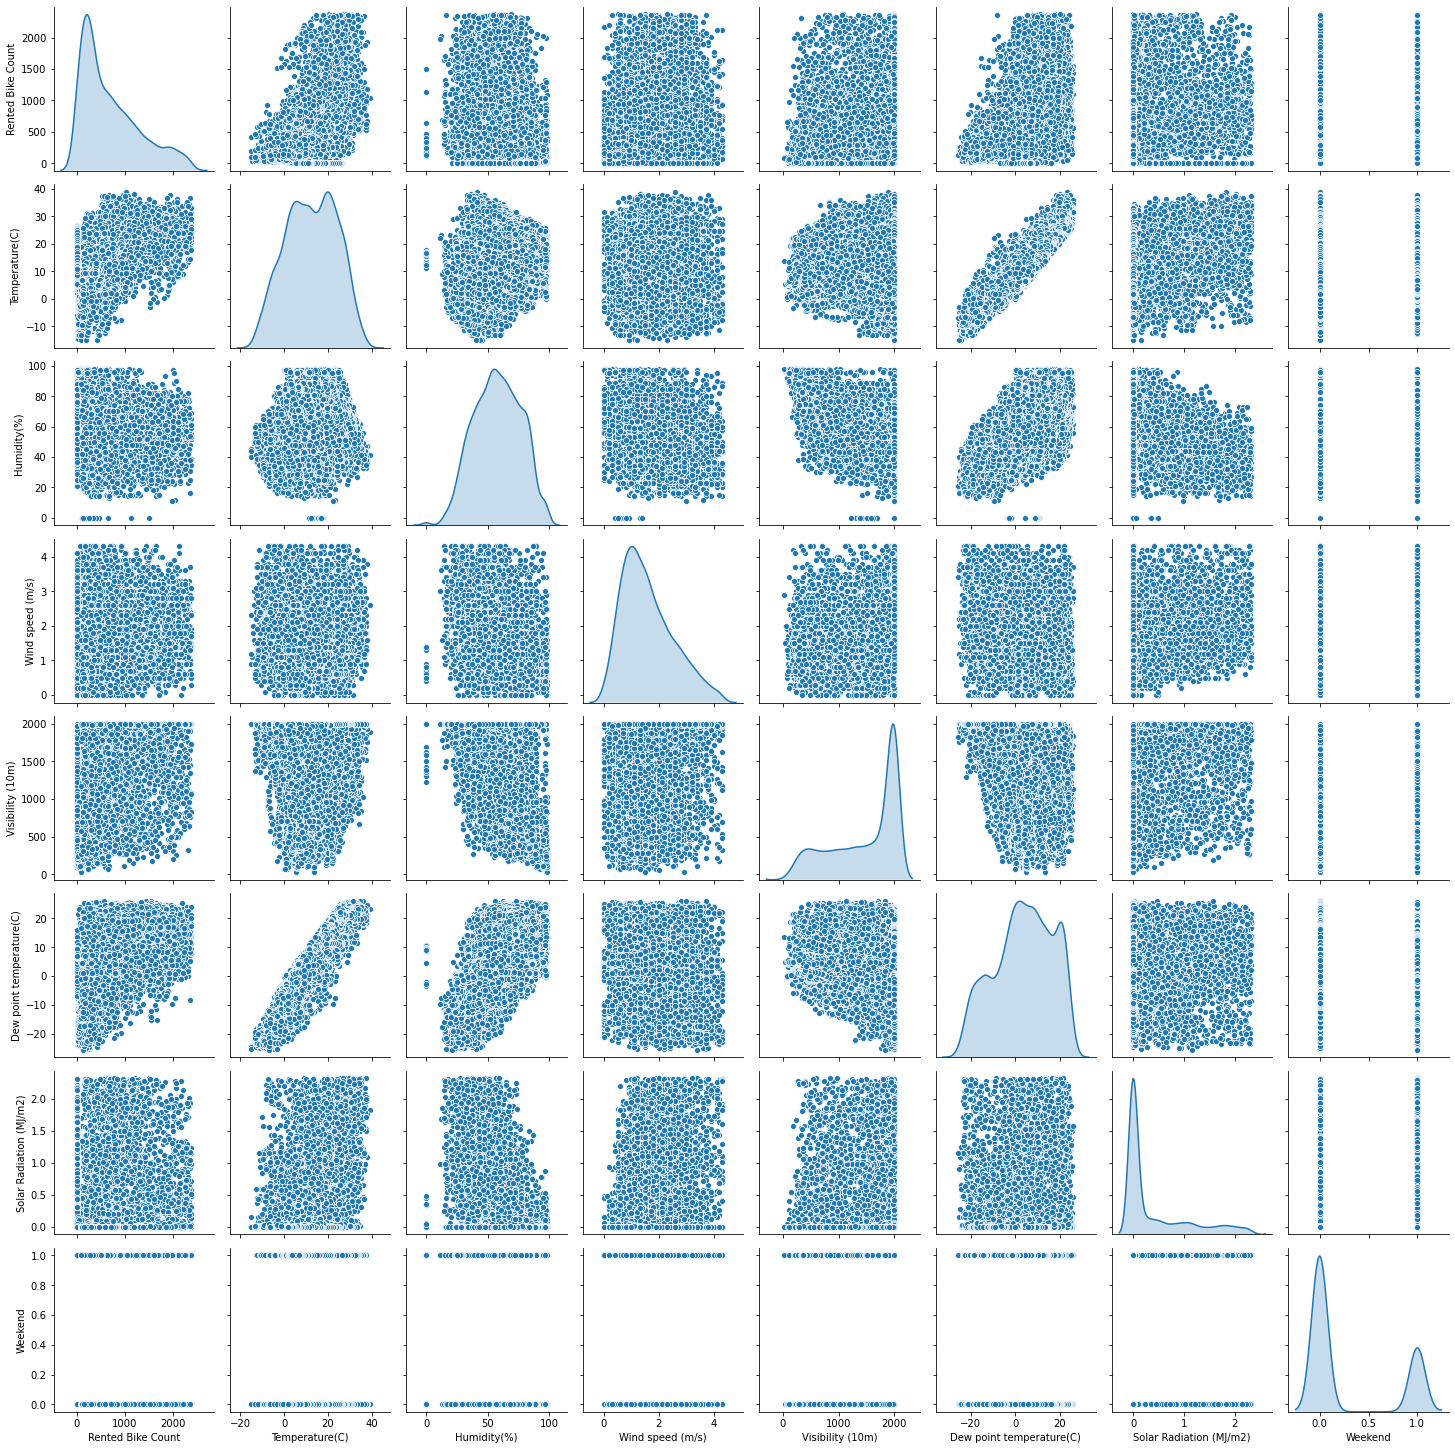

In [46]:
plt.figure(figsize=(15,15))
sns.pairplot(bikeData_num, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

**Observation1: some linearity is identified between Temperature and Dew point temperature**

In [47]:
corr = bikeData_feats.corr()


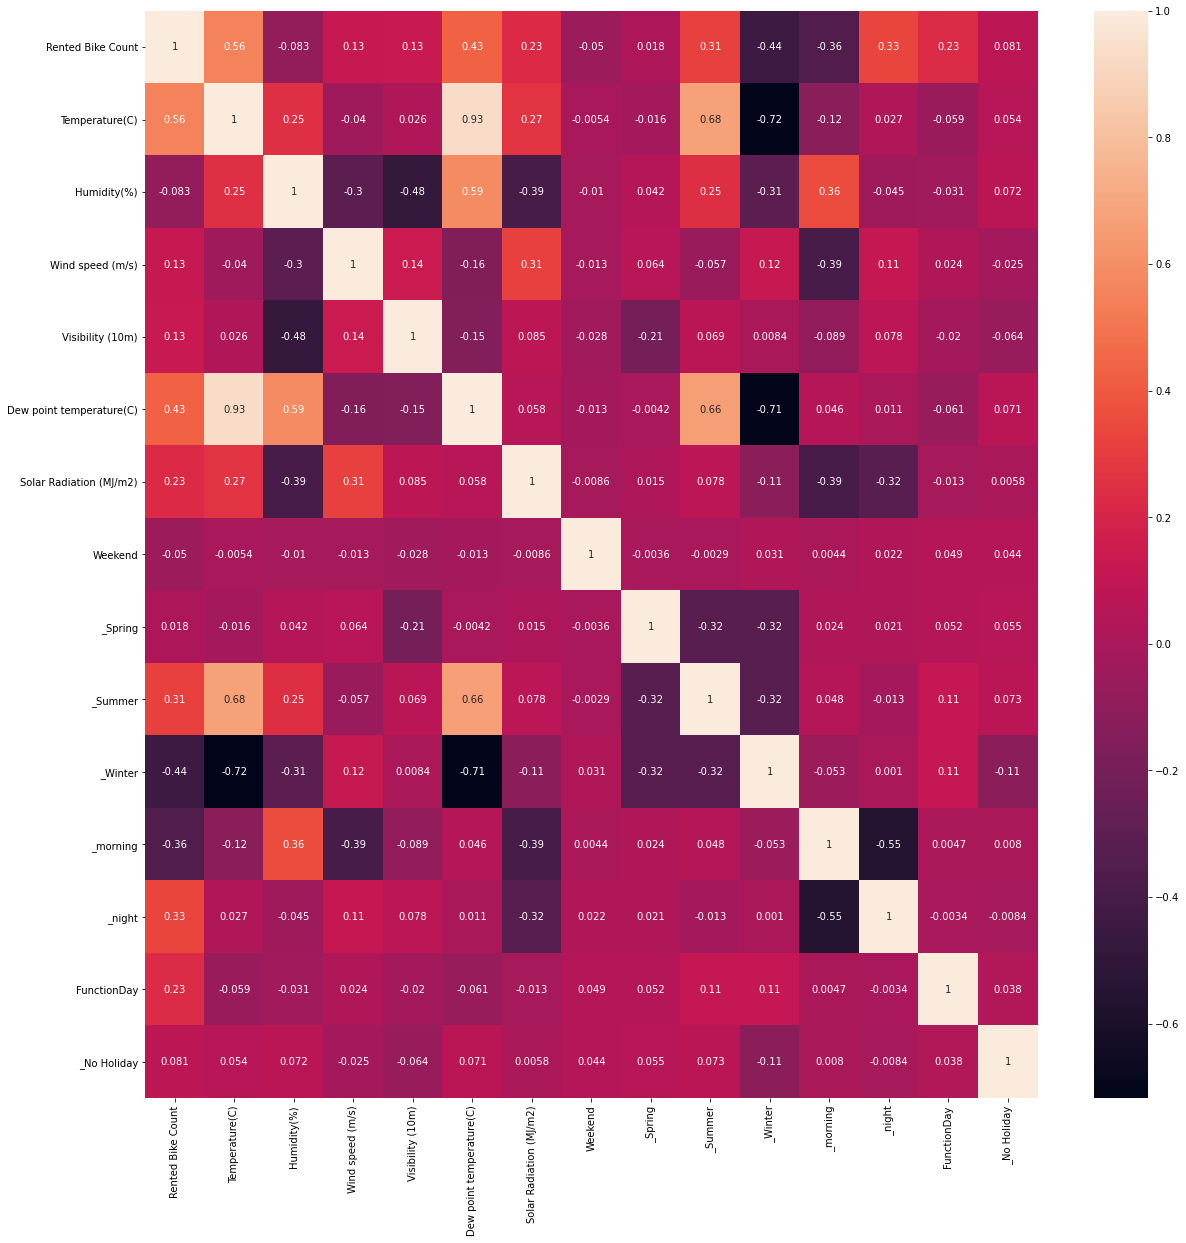

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

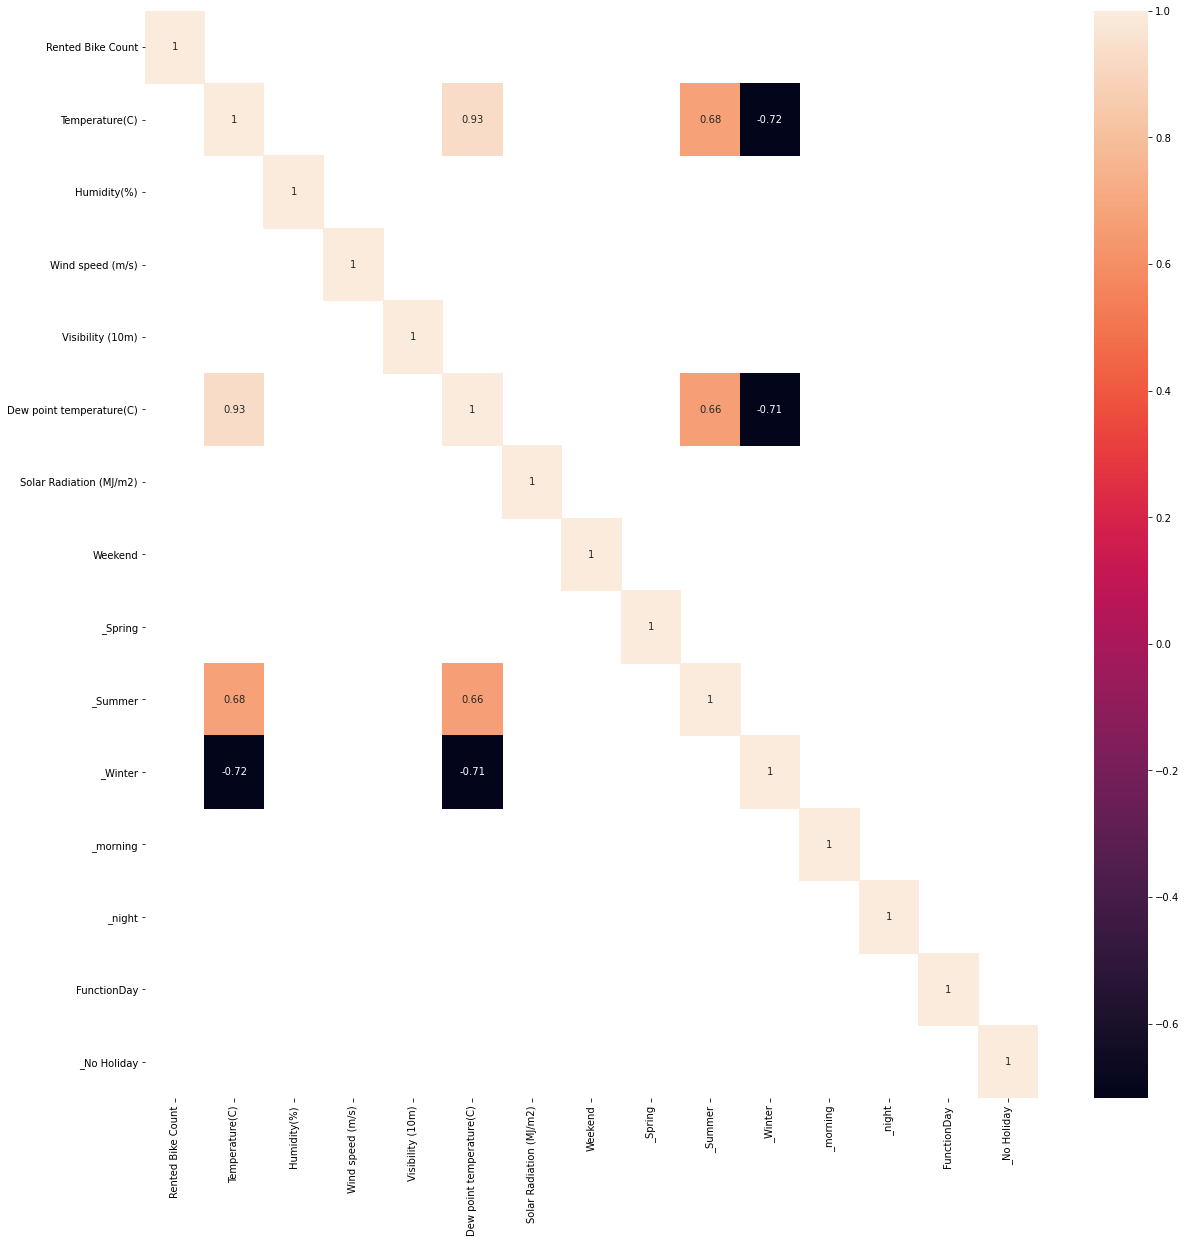

In [49]:
filter_corr = corr[np.abs(corr) > 0.6]
plt.figure(figsize=(20,20))
sns.heatmap(filter_corr, annot=True)

**Observation2: Significant linearity is identified between Temperature with Summer and Winter**

### 3.2 Model Building

In [50]:
Model_Features = list(bikeData_feats.columns)
Model_Features

['Rented Bike Count',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_morning',
 '_night',
 'FunctionDay',
 '_No Holiday']

In [51]:
Target_Variable = ['Rented Bike Count']

**Make a result dataframe**

In [52]:
#Model Parameters to be compared in each experiments
cols = ['Model_Name','Data_Type','Remarks', 
        'R-squared','Adj. R-squared', 
        'Durbin_Watson', 'JB_Prob', 'Condition_No',
        'MSE', 'RMSE', 'MAE']
# creating a empty dataframe of the colums
result_table_e3_set = pd.DataFrame(columns = cols)

In [53]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats,Target_Variable,"BIKE_LR_ALL_E31",
                                                              "All variables, no tranformation,\
                                                               no scaling, only categorical encoding",
                                                               result_table_e3_set,0.3,123)


Index(['const', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Weekend', '_Spring', '_Summer', '_Winter',
       '_morning', '_night', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [54]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     449.4
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:05:15   Log-Likelihood:                -35877.
No. Observations:                4845   AIC:                         7.178e+04
Df Residuals:                    4830   BIC:                         7.188e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -553.4004    121.487     -4.555      0.000    -791.570    -315.231
Temperature(C)              31.5191      4.553      6.923      0.000      22.594      40.445
Humidity(%)                 -3.8255      1.248     -3.065      0.002      -6.273      -1.378
Wind speed (m/s)            27.7204      7.081      3.915      0.000      13.837      41.603
Visibility (10m)            -0.0088      0.012     -0.729      0.466      -0.033       0.015
Dew point temperature(C)    -5.9370      4.712     -1.260      0.208     -15.175       3.301
Solar Radiation (MJ/m2)    120.6195     15.432      7.816      0.000      90.365     150.874
Weekend                    -86.2768     12.696     -6.795      0.000    -111.167     -61.387
_Spring                   -160.0281     17.020     -9.403      0.000    -193.394    -126.662
_Summer                   -180.2105     22.046     -8.174      0.000    -223.431    -136.990
_Winter                   -326.5757     24.007    -13.603      0.000    -373.640    -279.511
_morning                    37.9770     21.634      1.755      0.079      -4.436      80.390
_night                     499.2881     22.912     21.792      0.000     454.371     544.205
FunctionDay                980.9302     31.114     31.527      0.000     919.932    1041.929
_No Holiday                131.0030     26.506      4.942      0.000      79.040     182.966
==============================================================================
Omnibus:                      538.974   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.616
Skew:                           0.832   Prob(JB):                    1.71e-173
Kurtosis:                       4.082   Cond. No.                     3.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,150121.807993,387.455556,298.927789
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,158252.029130,397.809036,305.460620


### 3.3 Model Evaluation

#### 3.3.1 Determinant of correlaton Matrix

***Let D be the determinant of correlation matrix. \
Then 0 < D < 1\
D=0 High multicollinearity\
D=1 No multicollinearit***

In [56]:
bikeData_feats_noTarget = bikeData_feats.drop(Target_Variable,axis=1)
np.linalg.det(bikeData_feats_noTarget.corr())

8.94830728607228e-05

#### 3.3.2 Condition Number

***CN > 1000 Severe multicollinearity\
100 < CN < 1000 Moderate multicollinearity\
100 < CN No multicollinearity***

In [57]:
print("Condition Number is very High = ",lr_model.condition_number)

Condition Number is very High =  33783.549496792846


#### Experiment 2

Reduce some features which are shown as linear from the heatmap

In [60]:
bikeData_feats_e32 = bikeData_feats.drop(['_Summer', '_Winter','Dew point temperature(C)'],axis=1)

In [61]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E32",
                                                              "Base = BIKE_LR_ALL_E32,\
                                                               Removed high correlations",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Weekend', '_Spring',
       '_morning', '_night', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [62]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,150121.807993,387.455556,298.927789
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,158252.029130,397.809036,305.460620
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494


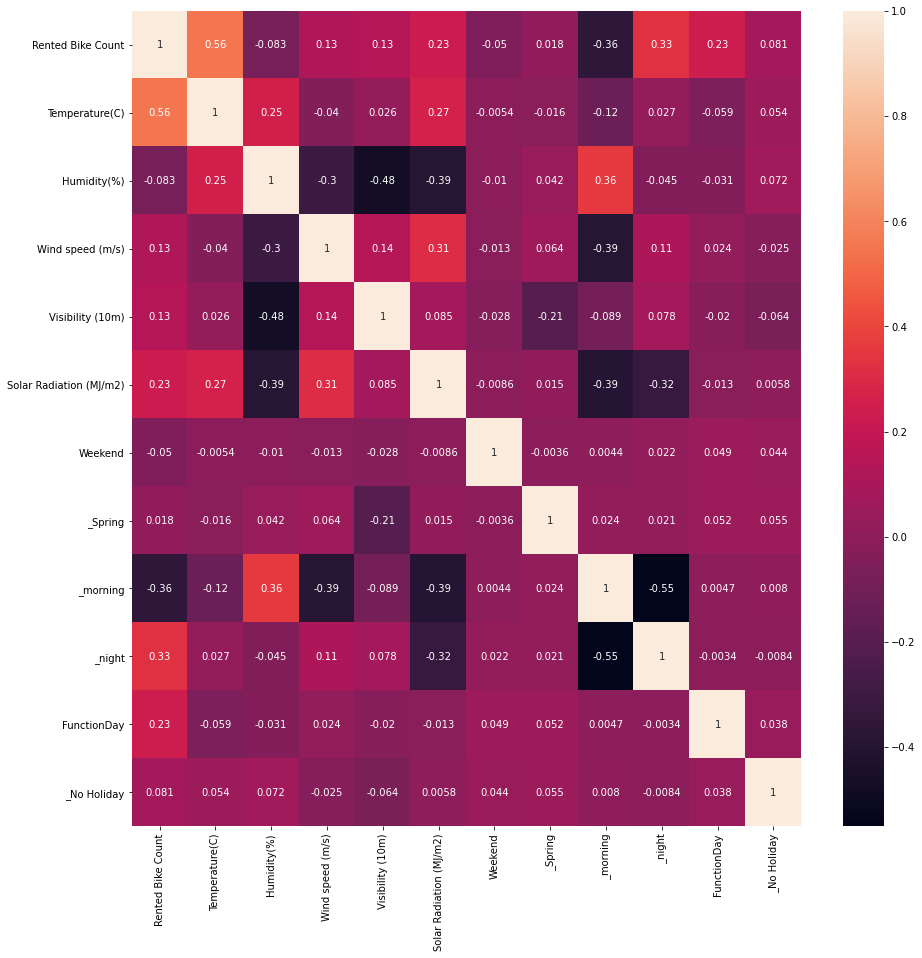

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(bikeData_feats_e32.corr(),annot=True)

#### Experiment 3

Reduce some more  features which are showing linearity near to 5

In [65]:
bikeData_feats_e33 = bikeData_feats.drop(['_Summer', '_Winter',\
                                          'Dew point temperature(C)',\
                                          'Humidity(%)','_night'],axis=1)

In [66]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E33",
                                                              "Removed correlation near to |0.5|,\
                                                               base BIKE_LR_ALL_E32",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Weekend', '_Spring',
       '_morning', '_night', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [67]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,158252.029130,397.809036,305.460620
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494


***Observation: No Improvement has been observed from Experiment 32***

#### Experiment 4

Lets Scale the Data

In [68]:
bikeData_feats_e34,var_names = standardScale_dataframe(bikeData_feats)

Rented Bike Count_std
Temperature(C)_std
Humidity(%)_std
Wind speed (m/s)_std
Visibility (10m)_std
Dew point temperature(C)_std
Solar Radiation (MJ/m2)_std
Weekend_std
_Spring_std
_Summer_std
_Winter_std
_morning_std
_night_std
FunctionDay_std
_No Holiday_std


In [69]:
bikeData_feats_e34_std = bikeData_feats_e34[var_names]


In [70]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e34_std,['Rented Bike Count_std'],"BIKE_LR_ALL_E34",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Temperature(C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(C)_std', 'Solar Radiation (MJ/m2)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


In [71]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494
6,BIKE_LR_ALL_E34_Test,Test,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,0.413767,0.643247,0.496275
7,BIKE_LR_ALL_E34_Train,Train,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,0.436175,0.660436,0.507120


In [72]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Rented Bike Count_std   R-squared:                       0.566
Model:                               OLS   Adj. R-squared:                  0.564
Method:                    Least Squares   F-statistic:                     449.4
Date:                   Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                           18:06:18   Log-Likelihood:                -4864.8
No. Observations:                   4845   AIC:                             9760.
Df Residuals:                       4830   BIC:                             9857.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0036      0.010      0.383      0.702      -0.015       0.022
Temperature(C)_std               0.5990      0.087      6.923      0.000       0.429       0.769
Humidity(%)_std                 -0.1189      0.039     -3.065      0.002      -0.195      -0.043
Wind speed (m/s)_std             0.0429      0.011      3.915      0.000       0.021       0.064
Visibility (10m)_std            -0.0087      0.012     -0.729      0.466      -0.032       0.015
Dew point temperature(C)_std    -0.1266      0.100     -1.260      0.208      -0.324       0.070
Solar Radiation (MJ/m2)_std      0.1301      0.017      7.816      0.000       0.097       0.163
Weekend_std                     -0.0651      0.010     -6.795      0.000      -0.084      -0.046
_Spring_std                     -0.1144      0.012     -9.403      0.000      -0.138      -0.091
_Summer_std                     -0.1274      0.016     -8.174      0.000      -0.158      -0.097
_Winter_std                     -0.2330      0.017    -13.603      0.000      -0.267      -0.199
_morning_std                     0.0314      0.018      1.755      0.079      -0.004       0.067
_night_std                       0.3648      0.017     21.792      0.000       0.332       0.398
FunctionDay_std                  0.3091      0.010     31.527      0.000       0.290       0.328
_No Holiday_std                  0.0475      0.010      4.942      0.000       0.029       0.066
==============================================================================
Omnibus:                      538.974   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.616
Skew:                           0.832   Prob(JB):                    1.71e-173
Kurtosis:                       4.082   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Experiment 5

No Scaling of Target Variable

In [73]:
bikeData_feats_e35_std = bikeData_feats_e34[var_names]
bikeData_feats_e35_std.drop('Rented Bike Count_std', axis=1, inplace=True)
bikeData_feats_e35_std = pd.concat([bikeData_feats_e35_std,bikeData['Rented Bike Count']],axis=1)

bikeData_feats_e35_std.head(3)

,Temperature(C)_std,Humidity(%)_std,Wind speed (m/s)_std,Visibility (10m)_std,Dew point temperature(C)_std,Solar Radiation (MJ/m2)_std,Weekend_std,_Spring_std,_Summer_std,_Winter_std,_morning_std,_night_std,FunctionDay_std,_No Holiday_std,Rented Bike Count
0,-1.543372,-1.112270,0.638114,0.903962,-1.662197,-0.635957,-0.640586,-0.570789,-0.558551,1.757441,1.083826,-0.596818,0.197158,0.230078,254
1,-1.569581,-1.058872,-0.862453,0.903962,-1.662197,-0.635957,-0.640586,-0.570789,-0.558551,1.757441,1.083826,-0.596818,0.197158,0.230078,204
2,-1.613263,-1.005474,-0.648086,0.903962,-1.669984,-0.635957,-0.640586,-0.570789,-0.558551,1.757441,1.083826,-0.596818,0.197158,0.230078,173


In [74]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e35_std,
                                                              ['Rented Bike Count'],"BIKE_LR_ALL_E35",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Temperature(C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(C)_std', 'Solar Radiation (MJ/m2)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


In [75]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     449.4
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:06:22   Log-Likelihood:                -35877.
No. Observations:                4845   AIC:                         7.178e+04
Df Residuals:                    4830   BIC:                         7.188e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          707.4911      5.726    123.568      0.000     696.266     718.716
Temperature(C)_std             360.7809     52.113      6.923      0.000     258.615     462.947
Humidity(%)_std                -71.6415     23.378     -3.065      0.002    -117.473     -25.810
Wind speed (m/s)_std            25.8625      6.607      3.915      0.000      12.910      38.815
Visibility (10m)_std            -5.2109      7.146     -0.729      0.466     -19.220       8.798
Dew point temperature(C)_std   -76.2422     60.512     -1.260      0.208    -194.874      42.390
Solar Radiation (MJ/m2)_std     78.3662     10.026      7.816      0.000      58.710      98.022
Weekend_std                    -39.1872      5.767     -6.795      0.000     -50.492     -27.882
_Spring_std                    -68.8959      7.327     -9.403      0.000     -83.261     -54.531
_Summer_std                    -76.7213      9.386     -8.174      0.000     -95.122     -58.321
_Winter_std                   -140.3751     10.319    -13.603      0.000    -160.605    -120.145
_morning_std                    18.9271     10.782      1.755      0.079      -2.211      40.065
_night_std                     219.7212     10.083     21.792      0.000     199.954     239.488
FunctionDay_std                186.1621      5.905     31.527      0.000     174.586     197.738
_No Holiday_std                 28.6256      5.792      4.942      0.000      17.271      39.980
==============================================================================
Omnibus:                      538.974   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.616
Skew:                           0.832   Prob(JB):                    1.71e-173
Kurtosis:                       4.082   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
result_table_e3_set.tail(20)

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,150121.807993,387.455556,298.927789
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.565686,0.564428,2.014408,1.714955e-173,33783.549497,158252.029130,397.809036,305.460620
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,160414.557299,400.517861,304.062706
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.537105,0.536051,2.001933,2.232438e-186,16730.444240,168666.517535,410.690294,309.563494
6,BIKE_LR_ALL_E34_Test,Test,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,0.413767,0.643247,0.496275
7,BIKE_LR_ALL_E34_Train,Train,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,0.436175,0.660436,0.507120
8,BIKE_LR_ALL_E35_Test,Test,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,150121.807993,387.455556,298.927789
9,BIKE_LR_ALL_E35_Train,Train,input and output variable scaled,0.565686,0.564428,2.014408,1.714955e-173,26.145863,158252.029130,397.809036,305.460620
